# Data Cleaning 

Check for missing values 

In [38]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/games_manipulated.csv', low_memory=False)
df_teams = pd.read_csv('../data/teams.csv',low_memory=False)
df_recruits = pd.read_csv('../data/recruits.csv',low_memory=False)

In [10]:
df.head() 

,Unnamed: 0,index,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,venue_id,venue,excitement_index,highlights,notes,main_team,home_game_flag,team_id,opposing_team_id,team_conference,opposing_conference,points_for,points_against,point_differential,team_line_scores,opposing_line_scores,team_pregame_elo,team_postgame_elo,opponent_pregame_elo,opponent_postgame_elo,win_flag,game_that_season
0,0,1,332412579,2013,1,regular,2013-08-29T22:00:00.000Z,NaN,True,False,False,81572.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,153,SEC,ACC,27.0,10.0,17.0,"[17, 3, 7, 0]","[0, 7, 3, 0]",1759.0,1785.0,1638.0,1612.0,1,1
1,1,324,332572579,2013,3,regular,2013-09-14T23:00:00.000Z,NaN,True,False,True,81371.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,238,SEC,SEC,35.0,25.0,10.0,"[21, 7, 7, 0]","[0, 10, 0, 15]",1769.0,1777.0,1644.0,1636.0,1,3
2,2,671,332782579,2013,6,regular,2013-10-05T23:30:00.000Z,NaN,True,False,True,82313.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,96,SEC,SEC,35.0,28.0,7.0,"[14, 10, 3, 8]","[0, 7, 0, 21]",1780.0,1768.0,1353.0,1365.0,1,5
3,3,1011,333062579,2013,10,regular,2013-11-02T16:21:00.000Z,NaN,True,False,True,82111.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,344,SEC,SEC,34.0,16.0,18.0,"[14, 3, 17, 0]","[7, 3, 0, 6]",1872.0,1890.0,1634.0,1616.0,1,9
4,4,1295,333202579,2013,12,regular,2013-11-17T00:00:00.000Z,NaN,True,False,True,83853.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,57,SEC,SEC,19.0,14.0,5.0,"[3, 3, 7, 6]","[7, 7, 0, 0]",1890.0,1887.0,1675.0,1678.0,1,10


In [46]:
result_df = df.groupby(['game_that_season', 'season_type']).agg(
    percent_missing=('team_pregame_elo', lambda x: (x.isnull().mean()) * 100),
    count=('team_pregame_elo', 'count')
).reset_index()
result_df.head(19) 

,game_that_season,season_type,percent_missing,count
0,1,postseason,100.000000,0
1,1,regular,73.189484,1081
2,2,postseason,100.000000,0
3,2,regular,68.408295,1173
4,3,postseason,100.000000,0
5,3,regular,65.248227,1274
6,4,regular,62.969050,1352
7,5,regular,61.849711,1386
8,6,postseason,0.000000,1
9,6,regular,61.644592,1390


In [55]:
regular_season_data

,game_that_season,season_type,percent_missing,count
1,1,regular,73.189484,1081
3,2,regular,68.408295,1173
5,3,regular,65.248227,1274
6,4,regular,62.969050,1352
7,5,regular,61.849711,1386
9,6,regular,61.644592,1390
11,7,regular,62.159911,1363
13,8,regular,62.301477,1353
15,9,regular,62.121212,1350
17,10,regular,61.511628,1324


In [63]:
regular_season_data = result_df[result_df['season_type'] == 'regular']

# fig, ax1 = plt.subplots()
# sns.barplot(regular_season_data, x='game_that_season', y='count' , color='grey')

# # ax2 = ax1.twinx()
# # sns.lineplot(regular_season_data, x='game_that_season', y='percent_missing' , marker='o')


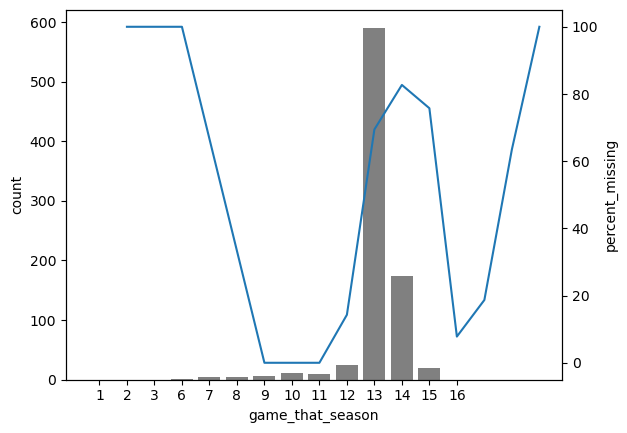

In [44]:
sns.lineplot(result_df[result_df['season_type'] == 'postseason'], x='game_that_season', y='percent_missing' )
sns.barplot(result_df[result_df['season_type'] == 'postseason'], x='game_that_season', y='count' , color='grey')

In [45]:
## Check Missingness 
percent_missing = round(df['team_pregame_elo'].isnull().sum()  / df['team_pregame_elo'].shape[0], 2)
print(f'Peercent of ELO that are missing: {percent_missing}')

Peercent of ELO that are missing: 0.61


In [ ]:
## When does this missingness happen? 
